In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [4]:
reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)
#reviews[['reviewCreatedVersion']] = reviews[['reviewCreatedVersion']].apply(pd.to_numeric)

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_6748\1821226182.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)
C:\Users\ARITRA\AppData\Local\Temp\ipykernel_6748\1821226182.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              16787 non-null  object        
 1   userName              16787 non-null  object        
 2   userImage             16787 non-null  object        
 3   content               16786 non-null  object        
 4   thumbsUpCount         16787 non-null  int64         
 5   reviewCreatedVersion  14430 non-null  object        
 6   at                    16787 non-null  datetime64[ns]
 7   replyContent          9168 non-null   object        
 8   repliedAt             9168 non-null   datetime64[ns]
 9   appVersion            14430 non-null  object        
 10  sortOrder             16787 non-null  object        
 11  appId                 16787 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 1.5+ MB


Lowercase

In [6]:
contents = reviews['content'].str.lower()
contents.head()

0    i have the same recurring tasks to do every da...
1    instead of shopping around, i downloaded any.d...
2    why does every once in a while... out of the b...
3    terrible update! this app used to be perfect f...
4    this app is deceivingly terrible. there are so...
Name: content, dtype: object

In [7]:
type(contents)

pandas.core.series.Series

Remove Hyperlinks

In [8]:
import re
def remove_hyperlinks(text):
    # Define regex pattern to match any kind of hyperlink
    pattern = r'\bhttps?://\S+\b|\bwww\.\S+\b'
    return re.sub(pattern, '', text)

In [9]:
contents = pd.Series([str(i) for i in contents])

In [10]:
contents

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Length: 16787, dtype: object

In [11]:
contents = contents.apply(remove_hyperlinks)
contents

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Length: 16787, dtype: object

Remove nextline character

In [12]:
contents = contents.replace('\n', ' ', regex=True)

Words containing numbers

In [13]:
def remove_words_with_numbers(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

In [14]:
contents = contents.apply(remove_words_with_numbers)

Remove Extra Spaces

In [15]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

In [16]:
contents = contents.apply(remove_extra_spaces)

In [17]:
contents

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Length: 16787, dtype: object

Special characters

In [18]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

In [19]:
contents = contents.apply(remove_special_characters)
contents

0        i have the same recurring tasks to do every da...
1        instead of shopping around i downloaded anydo ...
2        why does every once in a while out of the blue...
3        terrible update this app used to be perfect fo...
4        this app is deceivingly terrible there are som...
                               ...                        
16782                                        excellent app
16783    i love it easy to use make my life organize i ...
16784    i love how i could make plans and check the ap...
16785                                exactly what i needed
16786                                           very good 
Length: 16787, dtype: object

Removal of stop words

In [20]:
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def remove_stop_words(text):
    return list(word for word in text.split() if word.lower() not in stopwords.words('english'))



In [23]:
no_stops = contents.apply(remove_stop_words)
no_stops

0        [recurring, tasks, every, day, need, todolist,...
1        [instead, shopping, around, downloaded, anydo,...
2        [every, blue, app, asks, update, acct, emails,...
3        [terrible, update, app, used, perfect, plannin...
4        [app, deceivingly, terrible, really, nice, des...
                               ...                        
16782                                     [excellent, app]
16783    [love, easy, use, make, life, organize, love, ...
16784    [love, could, make, plans, check, app, almost,...
16785                                    [exactly, needed]
16786                                               [good]
Length: 16787, dtype: object

Stemming

In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [25]:
def stem_text(tokens):
    
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  
    return list(stemmed_tokens)

In [26]:
no_stops = no_stops.apply(stem_text)
no_stops

0        [recur, task, everi, day, need, todolist, remi...
1        [instead, shop, around, download, anydo, wide,...
2        [everi, blue, app, ask, updat, acct, email, ev...
3        [terribl, updat, app, use, perfect, plan, cert...
4        [app, deceivingli, terribl, realli, nice, desi...
                               ...                        
16782                                         [excel, app]
16783    [love, easi, use, make, life, organ, love, way...
16784    [love, could, make, plan, check, app, almost, ...
16785                                      [exactli, need]
16786                                               [good]
Length: 16787, dtype: object

Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:



lemmatizer = WordNetLemmatizer()

In [30]:
def lemmatize_text(words):
    
    
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    
    return lemmatized_words

In [31]:
lemmatized = no_stops.apply(lemmatize_text)
lemmatized

0        [recur, task, everi, day, need, todolist, remi...
1        [instead, shop, around, download, anydo, wide,...
2        [everi, blue, app, ask, updat, acct, email, ev...
3        [terribl, updat, app, use, perfect, plan, cert...
4        [app, deceivingli, terribl, realli, nice, desi...
                               ...                        
16782                                         [excel, app]
16783    [love, easi, use, make, life, organ, love, way...
16784    [love, could, make, plan, check, app, almost, ...
16785                                      [exactli, need]
16786                                               [good]
Length: 16787, dtype: object

Putting them together

In [32]:
def rejoin(words):
    return ' '.join(words)

In [33]:
clean_texts = lemmatized.apply(rejoin)
clean_texts

0        recur task everi day need todolist remind buzz...
1        instead shop around download anydo wide use se...
2        everi blue app ask updat acct email everyth ta...
3        terribl updat app use perfect plan certain tas...
4        app deceivingli terribl realli nice design fea...
                               ...                        
16782                                            excel app
16783    love easi use make life organ love way put pho...
16784    love could make plan check app almost everyday...
16785                                         exactli need
16786                                                 good
Length: 16787, dtype: object

In [36]:
#clean_texts.to_csv('clean_contents.csv', index=False)

In [35]:
reviews['content'] = clean_texts

In [37]:
reviews.to_csv('reviews_cleaned.csv', index=False)

Wordcloud

In [40]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 516.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 502.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 510.2 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/300.2 kB 570.5 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 630.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 679.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 640.0 kB/s eta 0:00:00


In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
all_content = ' '.join(reviews['content'])

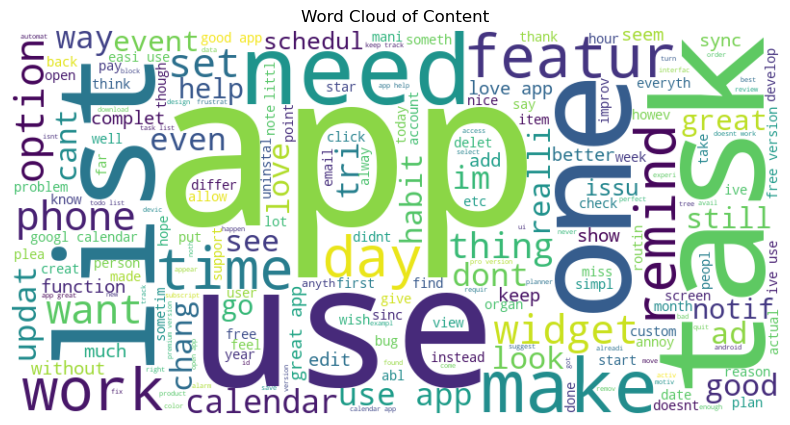

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_content)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()

Top 10 words

In [47]:
from collections import Counter

In [48]:
all_words = all_content.split()
all_words = Counter(all_words)

top_words = all_words.most_common(10)

In [50]:
top_words

[('app', 16238),
 ('use', 6845),
 ('task', 6220),
 ('like', 4092),
 ('time', 4061),
 ('work', 3696),
 ('list', 3363),
 ('would', 3189),
 ('calendar', 3184),
 ('day', 3067)]

In [57]:
top_words = pd.DataFrame(top_words, columns=['word', 'freq'])
top_words = top_words.sort_values(by='freq', ascending=True)
top_words

,word,freq
9,day,3067
8,calendar,3184
7,would,3189
6,list,3363
5,work,3696
4,time,4061
3,like,4092
2,task,6220
1,use,6845
0,app,16238


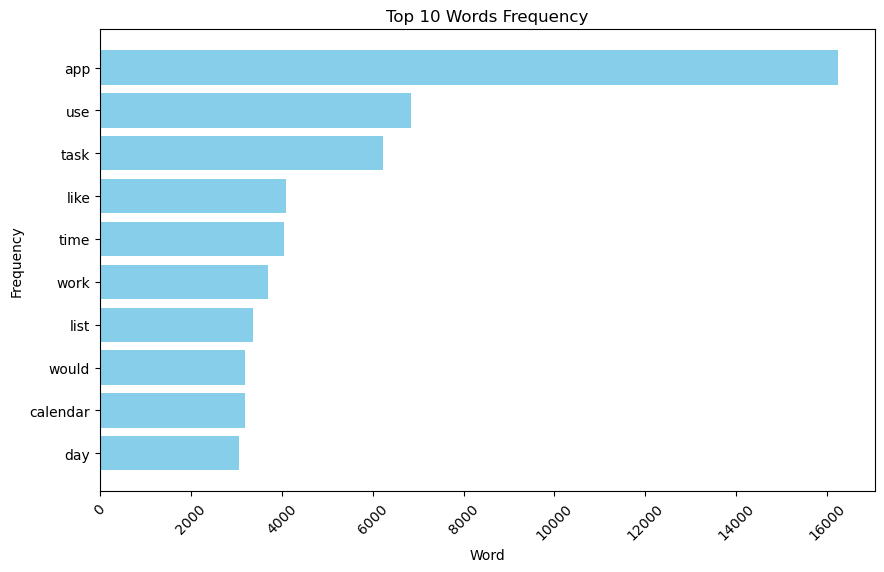

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['freq'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Words Frequency')
plt.xticks(rotation=45)
plt.show()